In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!pip install pillow

Defaulting to user installation because normal site-packages is not writeable


In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GRU, GlobalAveragePooling2D, TimeDistributed
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
from PIL import Image, ImageTk
import tkinter as tk
from tkinter import filedialog, messagebox, PhotoImage

In [8]:
base_path = './Dataset/AugmentedAlzheimerDataset'

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% validation data
)

train_gen = datagen.flow_from_directory(
    base_path,
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    base_path,
    target_size=(64, 64),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 27188 images belonging to 4 classes.
Found 6796 images belonging to 4 classes.


In [9]:
def build_cnn():
    cnn_model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='softmax')  # 4 classes
    ])

    cnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return cnn_model

In [17]:
from tensorflow.keras.applications import ResNet50

def build_resnet():
    base_model = ResNet50(include_top=False, input_shape=(64, 64, 3), weights='imagenet')
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dense(4, activation='softmax')  # 4 classes
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [21]:
checkpoint_cnn = ModelCheckpoint('cnn_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
checkpoint_resnet = ModelCheckpoint('resnet_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)


In [13]:
# Callbacks
checkpoint_cnn = ModelCheckpoint('cnn_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
checkpoint_rnn = ModelCheckpoint('rnn_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train CNN Model
print("Training CNN Model...")
cnn_model = build_cnn()
history_cnn = cnn_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[checkpoint_cnn, early_stopping, reduce_lr],
    verbose=1
)

Training CNN Model...
Epoch 1/20
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 5416s 3s/step - accuracy: 0.3139 - loss: 1.3553 - val_accuracy: 0.3977 - val_loss: 1.2488 - learning_rate: 1.0000e-04
Epoch 2/20
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 431s 254ms/step - accuracy: 0.3873 - loss: 1.2647 - val_accuracy: 0.4155 - val_loss: 1.2166 - learning_rate: 1.0000e-04
Epoch 3/20
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 433s 255ms/step - accuracy: 0.3974 - loss: 1.2433 - val_accuracy: 0.4064 - val_loss: 1.2111 - learning_rate: 1.0000e-04
Epoch 4/20
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 418s 246ms/step - accuracy: 0.4132 - loss: 1.2287 - val_accuracy: 0.4172 - val_loss: 1.2065 - learning_rate: 1.0000e-04
Epoch 5/20
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 391s 216ms/step - accuracy: 0.4108 - loss: 1.2207 - val_accuracy: 0.3961 - val_loss: 1.2333 - learning_rate: 1.0000e-04
Epoch 6/20
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 280s 165ms/step - accuracy: 0.4200 - loss: 1.2098 - val_accuracy: 0.4395 - val_loss: 1.1699 - learning_rate: 1.0000e-04
Epoch 7/

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 64, 64, 3), dtype=float32). Expected shape (None, 3, 64, 64, 3), but input has incompatible shape (None, 64, 64, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 64, 64, 3), dtype=float32)
  • training=True
  • mask=None

In [23]:
print("Training ResNet Model...")
resnet_model = build_resnet()
history_resnet = resnet_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[checkpoint_resnet, early_stopping, reduce_lr],
    verbose=1
)

Training ResNet Model...
Epoch 1/20
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 1501s 838ms/step - accuracy: 0.4077 - loss: 1.3359 - val_accuracy: 0.6109 - val_loss: 0.8366 - learning_rate: 1.0000e-04
Epoch 2/20
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 1419s 835ms/step - accuracy: 0.6292 - loss: 0.8151 - val_accuracy: 0.6853 - val_loss: 0.6935 - learning_rate: 1.0000e-04
Epoch 3/20
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 1420s 835ms/step - accuracy: 0.6854 - loss: 0.7019 - val_accuracy: 0.7145 - val_loss: 0.6399 - learning_rate: 1.0000e-04
Epoch 4/20
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 1430s 841ms/step - accuracy: 0.7215 - loss: 0.6244 - val_accuracy: 0.7145 - val_loss: 0.6158 - learning_rate: 1.0000e-04
Epoch 5/20
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 1405s 827ms/step - accuracy: 0.7600 - loss: 0.5584 - val_accuracy: 0.7306 - val_loss: 0.8265 - learning_rate: 1.0000e-04
Epoch 6/20
1700/1700 ━━━━━━━━━━━━━━━━━━━━ 1414s 831ms/step - accuracy: 0.7882 - loss: 0.5074 - val_accuracy: 0.7977 - val_loss: 0.4920 - learning_rate: 1.0000e-

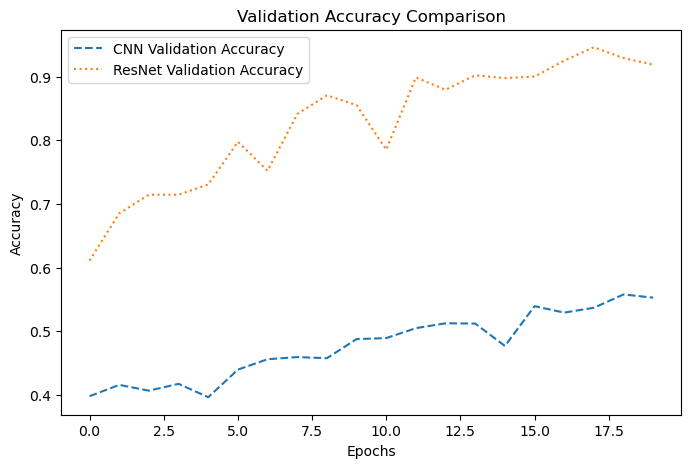

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy', linestyle='--')
plt.plot(history_resnet.history['val_accuracy'], label='ResNet Validation Accuracy', linestyle=':')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy_comparison_graph.png')
plt.show()

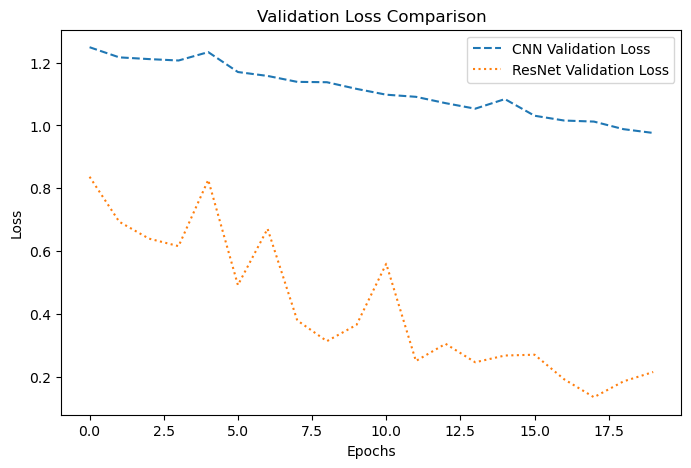

In [28]:
plt.figure(figsize=(8, 5))
plt.plot(history_cnn.history['val_loss'], label='CNN Validation Loss', linestyle='--')
plt.plot(history_resnet.history['val_loss'], label='ResNet Validation Loss', linestyle=':')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_comparison_graph.png')
plt.show()



Model Comparison Table:
    Model  Final Validation Accuracy  Final Validation Loss
0     CNN                   0.557681               0.976004
1  ResNet                   0.946439               0.135121


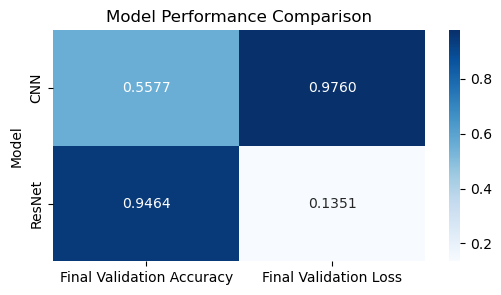

In [30]:
results = {
    "Model": ["CNN", "ResNet"],
    "Final Validation Accuracy": [
        max(history_cnn.history['val_accuracy']),
        max(history_resnet.history['val_accuracy'])
    ],
    "Final Validation Loss": [
        min(history_cnn.history['val_loss']),
        min(history_resnet.history['val_loss'])
    ]
}

results_df = pd.DataFrame(results)
print("\nModel Comparison Table:")
print(results_df)

# Heatmap for visual comparison
plt.figure(figsize=(6, 3))
sns.heatmap(results_df.set_index("Model"), annot=True, cmap='Blues', fmt='.4f')
plt.title('Model Performance Comparison')
plt.show()


**GUI**

No need torun above codes since already CNN and ResNet Model has been saved in the local system

In [33]:
import tkinter as tk
from tkinter import filedialog, messagebox, ttk
import pandas as pd
import os
from PIL import Image, ImageTk
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model


In [35]:
class AlzheimerDetectionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Alzheimer Detection System")
        self.root.geometry("1200x800")
        self.root.configure(bg="#f8f9fa")
        
        # Get the current working directory
        self.current_directory = os.getcwd()

        # Model file paths relative to current directory
        self.cnn_model_path = os.path.join(self.current_directory, "cnn_model.keras")
        self.resnet_model_path = os.path.join(self.current_directory, "resnet_model.keras")
        
        self.home_page()
    
    def clear_frame(self):
        """Clears all widgets from the main frame."""
        for widget in self.root.winfo_children():
            widget.destroy()

    def nav_bar_home(self):
        """Creates the home page navigation bar with brand name only."""
        nav_frame = tk.Frame(self.root, bg="#007bff", height=50)
        nav_frame.pack(side="top", fill="x")

        brand_label = tk.Label(nav_frame, text="Alzheimer Detection System", font=("Helvetica", 16, "bold"), fg="white", bg="#007bff")
        brand_label.pack(side="left", padx=20)

    def nav_bar(self):
        """Creates the detection and reports navigation bar."""
        nav_frame = tk.Frame(self.root, bg="#007bff", height=50)
        nav_frame.pack(side="top", fill="x")

        brand_label = tk.Label(nav_frame, text="Alzheimer Detection System", font=("Helvetica", 16, "bold"), fg="white", bg="#007bff")
        brand_label.pack(side="left", padx=20)

        self.add_nav_button(nav_frame, "Detection", self.detection_page)
        self.add_nav_button(nav_frame, "Reports", self.reports_page)
        self.add_nav_button(nav_frame, "Logout", self.home_page)

    def footer(self):
        """Creates the footer."""
        footer_frame = tk.Frame(self.root, bg="#e9ecef", height=40)
        footer_frame.pack(side="bottom", fill="x")
        footer_label = tk.Label(footer_frame, text="© 2025 Alzheimer Detection System", font=("Helvetica", 12), bg="#e9ecef")
        footer_label.pack()

    def add_nav_button(self, parent, text, command):
        """Adds buttons to the navbar."""
        btn = tk.Button(parent, text=text, font=("Helvetica", 12, "bold"), bg="#007bff", fg="white", bd=0, command=command)
        btn.pack(side="right", padx=10)

    def home_page(self):
        """Home page with welcome button."""
        self.clear_frame()
        self.nav_bar_home()

        body_frame = tk.Frame(self.root, bg="#f8f9fa", pady=20)
        body_frame.pack(expand=True, fill="both")

        welcome_label = tk.Label(body_frame, text="Welcome to the Alzheimer Detection System!", font=("Helvetica", 24, "bold"), bg="#f8f9fa")
        welcome_label.pack(pady=20)

        about_text = (
            "This application helps healthcare professionals and researchers "
            "by providing a powerful tool for early-stage Alzheimer’s detection using MRI images. "
            "By identifying potential cases earlier, it aids in effective medical interventions, "
            "improving patient outcomes and supporting research studies."
        )
        about_label = tk.Label(body_frame, text=about_text, font=("Helvetica", 14), wraplength=900, justify="center", bg="#f8f9fa")
        about_label.pack(pady=20)

        welcome_btn = tk.Button(body_frame, text="Get Started", font=("Helvetica", 16, "bold"), bg="#00cc99", fg="white", padx=20, pady=10, command=self.detection_page)
        welcome_btn.pack(pady=40)

        self.footer()

    def detection_page(self):
        """Detection page for patient details and image upload."""
        self.clear_frame()
        self.nav_bar()

        main_frame = tk.Frame(self.root, bg="#f8f9fa")
        main_frame.pack(expand=True, fill="both", padx=20, pady=20)

        # Left Frame: Form
        form_frame = tk.Frame(main_frame, bg="#e6f7ff", padx=20, pady=20)
        form_frame.pack(side="left", fill="y", padx=20)

        tk.Label(form_frame, text="Enter Patient Details:", font=("Helvetica", 16, "bold"), bg="#e6f7ff").pack(pady=10)

        self.name_var = tk.StringVar()
        self.age_var = tk.StringVar()
        self.contact_var = tk.StringVar()
        self.address_var = tk.StringVar()
        self.remarks_var = tk.StringVar()
        self.model_choice = tk.StringVar(value="CNN")
        self.predicted_stage = None  # Variable to hold predicted stage

        self.create_input_row(form_frame, "Name:", self.name_var)
        self.create_input_row(form_frame, "Age:", self.age_var)
        self.create_input_row(form_frame, "Contact:", self.contact_var)
        self.create_input_row(form_frame, "Address:", self.address_var)
        self.create_input_row(form_frame, "Remarks:", self.remarks_var)

        tk.Label(form_frame, text="Select Model:", font=("Helvetica", 12), bg="#e6f7ff").pack(pady=10)
        tk.Radiobutton(form_frame, text="CNN", variable=self.model_choice, value="CNN", font=("Helvetica", 12), bg="#e6f7ff").pack()
        tk.Radiobutton(form_frame, text="ResNet", variable=self.model_choice, value="ResNet", font=("Helvetica", 12), bg="#e6f7ff").pack()

        # Upload button
        self.upload_btn = tk.Button(form_frame, text="Upload MRI", font=("Helvetica", 14), bg="#00cc99", fg="white", command=self.upload_image)
        self.upload_btn.pack(pady=20)

        # Right Frame: Image and Prediction
        self.display_frame = tk.Frame(main_frame, bg="#f8f9fa")
        self.display_frame.pack(side="right", expand=True, fill="both", padx=20)

        self.footer()

    def create_input_row(self, parent, label_text, var):
        """Creates a row for input fields."""
        row_frame = tk.Frame(parent, bg="#e6f7ff")
        row_frame.pack(pady=5)
        tk.Label(row_frame, text=label_text, font=("Helvetica", 12), bg="#e6f7ff").pack(side="left", padx=10)
        tk.Entry(row_frame, textvariable=var, font=("Helvetica", 12), width=30).pack(side="left")

    def upload_image(self):
        """Handles image upload and prediction."""
        file_path = filedialog.askopenfilename(filetypes=[('Image Files', '*.jpg;*.png')])
        if not file_path:
            return

        for widget in self.display_frame.winfo_children():
            widget.destroy()

        uploaded_img = Image.open(file_path)
        uploaded_img.thumbnail((300, 300))
        img = ImageTk.PhotoImage(uploaded_img)

        image_label = tk.Label(self.display_frame, image=img, bg="#f8f9fa")
        image_label.image = img
        image_label.pack(pady=10)

        result, confidence = self.predict_image(self.model_choice.get(), file_path)
        self.predicted_stage = result  # Store predicted stage
        prediction_label = tk.Label(self.display_frame, text=f"Prediction: {result} ({confidence * 100:.2f}%)", font=("Helvetica", 14, "bold"), bg="#f8f9fa")
        prediction_label.pack(pady=10)

        # Save button appears after prediction
        save_btn = tk.Button(self.display_frame, text="Save Details", font=("Helvetica", 14), bg="#3366cc", fg="white", command=self.save_data)
        save_btn.pack(pady=10)

    def predict_image(self, model_choice, image_path):
        """Predicts Alzheimer's stage using selected model."""
        img = load_img(image_path, target_size=(64, 64))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Load model based on user selection
        if model_choice == "CNN":
            if not os.path.exists(self.cnn_model_path):
                messagebox.showerror("Error", "CNN model file not found!")
                return "Error", 0.0
            model = load_model(self.cnn_model_path)
        else:
            if not os.path.exists(self.resnet_model_path):
                messagebox.showerror("Error", "ResNet model file not found!")
                return "Error", 0.0
            model = load_model(self.resnet_model_path)

        predictions = model.predict(img_array)
        class_idx = np.argmax(predictions)
        class_labels = ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very Mild Demented']
        return class_labels[class_idx], np.max(predictions)

    def save_data(self):
        """Saves patient details and prediction result to CSV."""
        data = {
            'Name': self.name_var.get(),
            'Age': self.age_var.get(),
            'Contact': self.contact_var.get(),
            'Address': self.address_var.get(),
            'Remarks': self.remarks_var.get(),
            'Prediction': self.predicted_stage
        }

        if not os.path.exists('patient_records.csv'):
            df = pd.DataFrame(columns=data.keys())
            df.to_csv('patient_records.csv', index=False)

        df = pd.read_csv('patient_records.csv')
        df = pd.concat([df, pd.DataFrame([data])], ignore_index=True)
        df.to_csv('patient_records.csv', index=False)
        messagebox.showinfo('Success', 'Patient data saved successfully!')

        # Clear input fields
        self.clear_input_fields()

    def clear_input_fields(self):
        """Clears all the input fields after saving."""
        self.name_var.set("")
        self.age_var.set("")
        self.contact_var.set("")
        self.address_var.set("")
        self.remarks_var.set("")

    def reports_page(self):
        """Reports page to display saved records."""
        self.clear_frame()
        self.nav_bar()

        frame = tk.Frame(self.root, bg="#f8f9fa")
        frame.pack(expand=True, fill="both")

        tk.Label(frame, text="Patient Records", font=("Helvetica", 18, "bold"), bg="#f8f9fa").pack(pady=20)

        if os.path.exists('patient_records.csv'):
            df = pd.read_csv('patient_records.csv')
            columns = list(df.columns)

            # Treeview table
            table = ttk.Treeview(frame, columns=columns, show='headings')
            for col in columns:
                table.heading(col, text=col)
                table.column(col, width=200)
            for _, row in df.iterrows():
                table.insert("", "end", values=list(row))
            table.pack(expand=True, fill="both")
        else:
            tk.Label(frame, text="No records found!", font=("Helvetica", 14), bg="#f8f9fa").pack(pady=20)

        self.footer()


In [37]:
if __name__ == "__main__":
    root = tk.Tk()
    app = AlzheimerDetectionApp(root)
    root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
